# Bay Wheels Data Exploration
## by Laila Madany

## Preliminary Wrangling

> This document explores a [dataset](https://s3.amazonaws.com/fordgobike-data/index.html) containing different attributes of approximately 1,860,000 trips in 2018. It includes information about individual rides made in a bike-sharing system (Bay Wheels) covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

In [2]:
#Match the pattern (‘csv’) and save the list of file names in the ‘all_filenames’ variable
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list <br>
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv <br>
combined_csv.to_csv( "trips.csv", index=False)

In [3]:
# load in the dataset into a pandas dataframe, print first 10 rows
trips = pd.read_csv('trips.csv')

In [4]:
#check the first rows
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


### Assessing

In [5]:
# high-level overview of data shape 
print(trips.shape)

(1863721, 16)


In [6]:
#checking summary info
trips.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1863721 non-null  int64  
 1   start_time               1863721 non-null  object 
 2   end_time                 1863721 non-null  object 
 3   start_station_id         1851950 non-null  float64
 4   start_station_name       1851950 non-null  object 
 5   start_station_latitude   1863721 non-null  float64
 6   start_station_longitude  1863721 non-null  float64
 7   end_station_id           1851950 non-null  float64
 8   end_station_name         1851950 non-null  object 
 9   end_station_latitude     1863721 non-null  float64
 10  end_station_longitude    1863721 non-null  float64
 11  bike_id                  1863721 non-null  int64  
 12  user_type                1863721 non-null  object 
 13  member_birth_year        1753003 non-null 

In [9]:
# descriptive statistics for numeric variables
trips.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


#### Quality Issues

- Erroneous datatypes: start_time and end_time are not DateTime, bike_id, start_station_id and end_station_id is not string, member_birth_year is not int, member gender and user type are not categorical objects


- There are missing values in the member_birth_year and member_gender columns. Start and End station columns also have missing values but they won't be used in this project.

### Cleaning

Let's start by creating a copy of the dataframe.

In [10]:
#creating a copy
df_clean = trips.copy()

##### Define

***There are missing values in the member_birth_year and member_gender columns.***

There might be multiple reasons behind these missing data and it could also be simply because the user didn't include such information. Also these missing values make up a small portion of our large dataset, so they will be dropped.

##### Code

In [11]:
df_clean.dropna(subset=['member_birth_year', 'member_gender'], inplace = True)

##### Test

In [12]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753003 entries, 0 to 1863719
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1753003 non-null  int64  
 1   start_time               1753003 non-null  object 
 2   end_time                 1753003 non-null  object 
 3   start_station_id         1741556 non-null  float64
 4   start_station_name       1741556 non-null  object 
 5   start_station_latitude   1753003 non-null  float64
 6   start_station_longitude  1753003 non-null  float64
 7   end_station_id           1741556 non-null  float64
 8   end_station_name         1741556 non-null  object 
 9   end_station_latitude     1753003 non-null  float64
 10  end_station_longitude    1753003 non-null  float64
 11  bike_id                  1753003 non-null  int64  
 12  user_type                1753003 non-null  object 
 13  member_birth_year        1753003 non-null 

##### Define

***Erroneous datatypes: start_time and end_time are not DateTime, bike_id, start_station_id and end_station_id is not string, member_birth_year is not int, member gender and user type are not categorical objects***

Convert these columns to their appropriate datatypes.

##### Code

In [13]:
#converting start_time & end_time to DateTime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

#converting bike_id, start_station_id and end_station_id to string
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

#converting member_birth_year into int
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

#converting member_gender & user_type into categorical variables
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')

##### Test

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753003 entries, 0 to 1863719
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        int64         
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
dtypes: category(2), datetime64[ns](2), float64(4), int64(2), object(6)
memor

### Feature Engineering

For our data investigation, we will extract and create new columns for further insights and more interesting findings!

- Member Age
- Time of the Day, Day of the Week, Month of the Year (Start time Column)
- Duration in minutes

In [15]:
#Subtract the member_birth_year from the year of this dataset (2018)
df_clean['member_age'] = 2018 - df_clean['member_birth_year']

In [16]:
#extract time of the day
df_clean['hour']= df_clean['start_time'].dt.hour
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No,32,22
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No,22,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No,27,19
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No,30,23
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No,38,23


In [17]:
#extract day of the week
df_clean['day'] = df_clean.start_time.dt.strftime("%A")
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,hour,day
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No,32,22,Wednesday
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No,22,14,Wednesday
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No,27,19,Wednesday
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No,30,23,Wednesday
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No,38,23,Wednesday


In [18]:
#extract month of the year
df_clean['month'] = df_clean.start_time.dt.strftime("%b")
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,hour,day,month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No,32,22,Wednesday,Jan
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No,22,14,Wednesday,Jan
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No,27,19,Wednesday,Jan
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No,30,23,Wednesday,Jan
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No,38,23,Wednesday,Jan


In [19]:
#add duration min column
df_clean['duration_min'] = df_clean['duration_sec']/60

In [20]:
#converting duration into int
df_clean.duration_min = df_clean.duration_min.astype(int)

In [21]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753003 entries, 0 to 1863719
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1753003 non-null  int64         
 1   start_time               1753003 non-null  datetime64[ns]
 2   end_time                 1753003 non-null  datetime64[ns]
 3   start_station_id         1753003 non-null  object        
 4   start_station_name       1741556 non-null  object        
 5   start_station_latitude   1753003 non-null  float64       
 6   start_station_longitude  1753003 non-null  float64       
 7   end_station_id           1753003 non-null  object        
 8   end_station_name         1741556 non-null  object        
 9   end_station_latitude     1753003 non-null  float64       
 10  end_station_longitude    1753003 non-null  float64       
 11  bike_id                  1753003 non-null  object        
 12  

In [22]:
# convert day, month into ordered categorical types
ordinal_var_dict = {'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

### What is the structure of your dataset?

>  There are 961,131 bike trips in the dataset with 20 features and most variables are numeric in nature. There are also categorical, string and DateTime datatypes. <br>
 Each trip is anonymized and includes:
  - Trip Duration (seconds)
  - Start Time and Date
  - End Time and Date
  - Start Station ID
  - Start Station Name
  - Start Station Latitude
  - Start Station Longitude
  - End Station ID
  - End Station Name
  - End Station Latitude
  - End Station Longitude
  - Bike ID
  - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
  - Member Birth Year 
  - Member Gender
  
 >  As part of feature engineering, the below features were added:
   - Member Age
   - Time of the Day, Day of the Week, Month of the Year (Start time Column)
   - Duration in minutes

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out the peak times when bikes are high in demand as well as when they are low in demand for both user types. In addition to understanding their patterns as well as exploring how the trip duration varies.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will support the investigation the most is the start date and time.In addition, the bike user information such as their type, age and gender is important to understand Bay Wheels'customer base. 

## Univariate Exploration

> Let's start by looking at the distribution of duration in minutes.

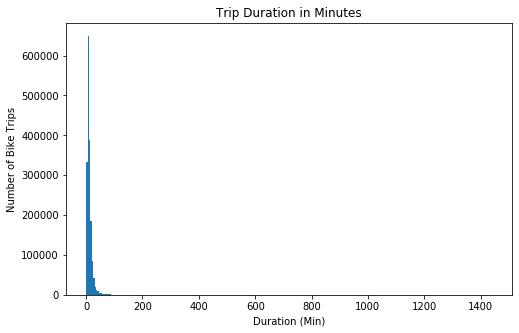

In [23]:
# start with a standard-scaled plot 
binsize = 5
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.title("Trip Duration in Minutes")
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Bike Trips');

The initial plot show some immediate points of attention. Most of the data is set to the far left of their axes, suggesting some strong outliers on the right. Let's take a closer look at these values on the left.

In [24]:
#longest trip duration in minutes
df_clean.duration_min.max()

1438

In [25]:
#print the 99th percentile 
df_clean.duration_min.describe(percentiles=[.99])

count    1.753003e+06
mean     1.247150e+01
std      3.306743e+01
min      1.000000e+00
50%      9.000000e+00
99%      6.500000e+01
max      1.438000e+03
Name: duration_min, dtype: float64

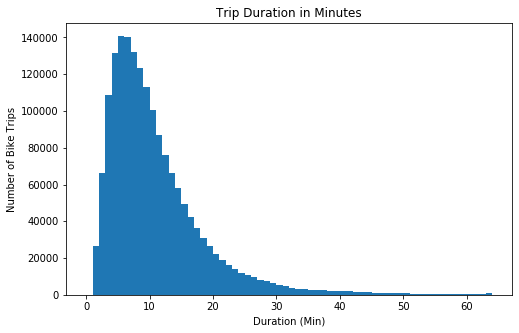

In [26]:
## investigating further on an even smaller bin size and limiting the axis
binsize = 1
bins = np.arange(0, 65, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.title("Trip Duration in Minutes")
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Bike Trips');

- Based on the above so far, the most common duration is between 5 to 10 min. The longest trip was 1438 mins and since these long trips were distorting the histogram (outlier), axis limits were set. This type of pricing plan is based on information found online [link](https://en.wikipedia.org/wiki/Bay_Wheels). This could be further researched by understanding different pricing options and their purchase patterns compared to other years whilst further looking into allowed increment duration for each plan.


- Since 99% of trip duration fall below 65, we will exclude the 1% extreme outliers from visualizations when necessary as it will distort them.

Since the trip duration is skewed to the right, I used a log transformation on the x-axis.

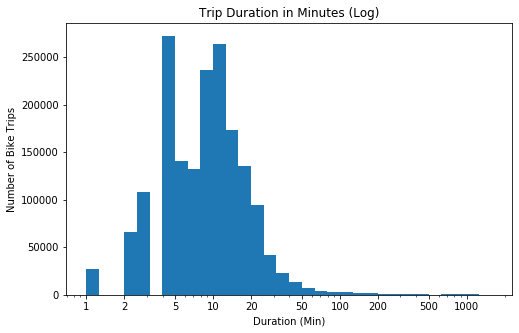

In [27]:
# there's a long tail in the distribution, so let's put it on a log scale instead

log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)
ticks = ([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
labels = ['{}'.format(val) for val in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.title("Trip Duration in Minutes (Log)")
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Bike Trips')
plt.show()

The logarithmic transformation model shows a bimodal distribution with one peak a little below 5 and the other a little above 10 with. The bars then gradually decrease until around 100 where it remains nearly constant. Also, the graph shows a drop in the number of trips between the two peaks.

Next up, let's look at the age feature.

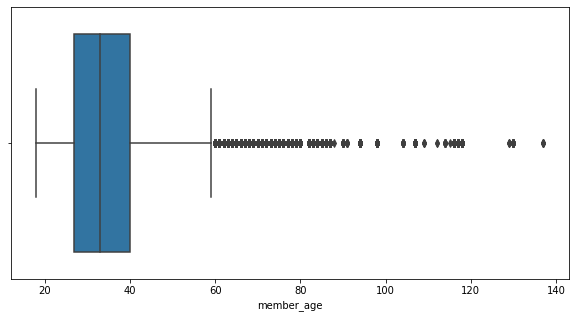

In [28]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df_clean, x = 'member_age', color = base_color);

There are age outliers where members are above the age of 60 years. Since they represent a small portion of the member population. Also some need to be verfied as according to wikipedia's [list](https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people), the oldest person aged 122 years old! The average age is around 35 years old and the youngest is somewhere around 18 years old.

##### Code

In [29]:
df_clean = df_clean.query('member_age <= 60')

##### Test

In [30]:
df_clean.query('member_age > 60')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,hour,day,month,duration_min


Moving on, let's look at our hourly, weekly and monthly data.

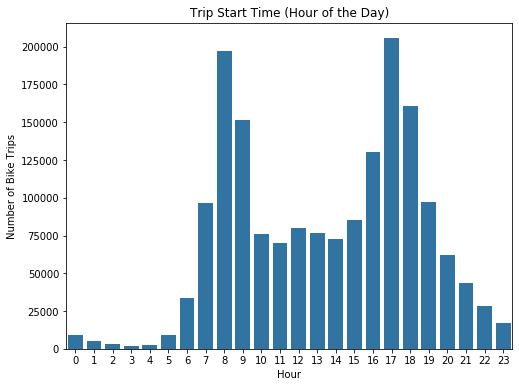

In [31]:
#trip start time by hour distribution
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'hour', color = base_color)
plt.title("Trip Start Time (Hour of the Day)")
plt.xlabel('Hour')
plt.ylabel('Number of Bike Trips');

The distribution is bimodal with a peak at 8 AM and another at 5 PM. There is a steep drop starting 10 AM where it only starts gradually ramping up again at 3 PM. This is expected since that's the typical working and school hours and it gives insight into people using Bay Wheels for commuting.

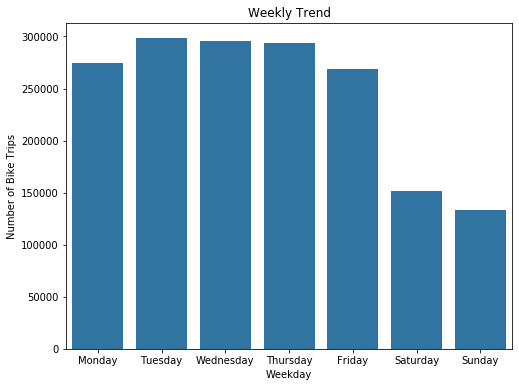

In [32]:
#trip start time by day distribution
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'day', color = base_color)
plt.title("Weekly Trend")
plt.xlabel('Weekday')
plt.ylabel('Number of Bike Trips');

Bay Wheels is mainly used during weekdays with tuesday and wednesday having the highest demand levels in 2018. This further sheds light into the above insight that bikes are used for work/school commuting. It would be interesting to plot this against trip duration for further insights.

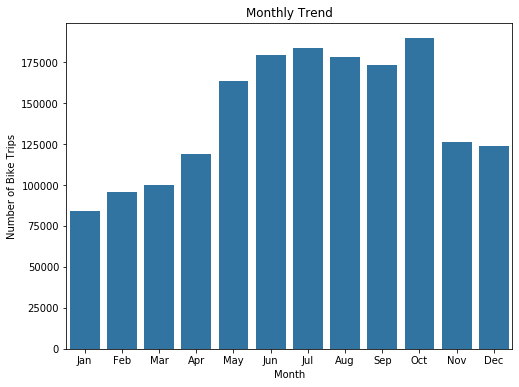

In [33]:
#trip start time by month distribution
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'month', color = base_color)
plt.title("Monthly Trend")
plt.xlabel('Month')
plt.ylabel('Number of Bike Trips');

Bay Wheels Demand is considered high starting May until reaching the highest peak in October compared to the other months. July comes in second place after October. During winter months, the demand is quite low which is quite expected given the freezing cold weather. Januaray is considered to be the coldest month in San Francisco [Reference Link](https://www.weather-us.com/en/california-usa/san-francisco-climate).

Let's explore the user type and gender.

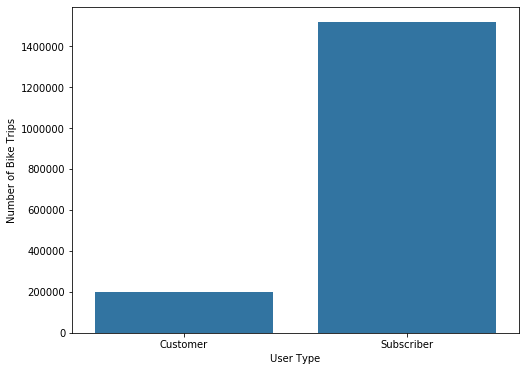

In [34]:
#user type barchart
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'user_type', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Number of Bike Trips');

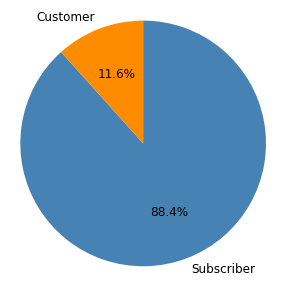

In [35]:
#user type pie chart
plt.figure(figsize = [8, 5])
sorted_counts = df_clean['user_type'].value_counts()
colors = ['steelblue', 'darkorange']
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%', 
        colors = colors, textprops={'fontsize': 12})
plt.axis('square');

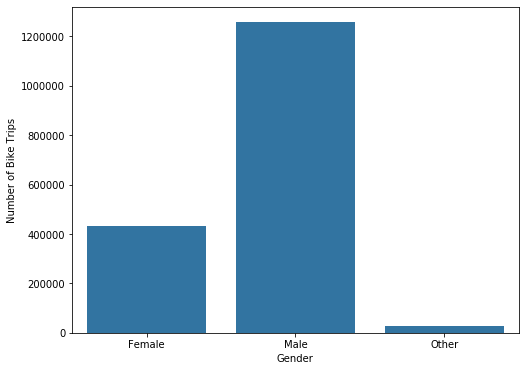

In [41]:
#member gender barchart
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'member_gender', color = base_color)
plt.xlabel('Gender')
plt.ylabel('Number of Bike Trips');

Most members that used Bay Wheels in 2018 were subscribers and not casual customers. In addition, more males are using this on-demand service.

In [92]:
#store our clean dataframe in a CSV file
df_clean.to_csv('clean_dataset.csv', index=False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Trip Duration was closely looked at and the majority fell into short rides between 5 to 10 minutes. The plot was skewed to the right with a long tail so a logarithmic transaformation was applied. It showed a bimodal distribution with one peak a little below 5, the other a little above 10 and a sudden drop in the number of trips between these ranges. In 2018, there was a high demand usually around 8-9 AM and then 5-6PM. People used Bay Wheels more on weekdays than weekends. Regarding monthly trends, January had the lowest number of trips and the trend was usually higher in early-mid autumn and summer time. Most members were males and subscribers.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Using the existing birth year, age was calculated. Through the boxplot, the outlier points which were above 60 years old were removed especially that some ages needed to be check and verfied such as 140 years old. Other features were extracted from the start_date column such as the time (hour), weekday and month for better visualizations and simplicity to manipulate. The trip distribution included some outliers with the longest trip that lasted 1438 minutes. This is interesting to be further researched especially in comparison to other years but won't be included in this project. Since 99% of trip duration fall below 65, we will exclude the 1% extreme outliers from visualizations when necessary as it will distort them.


## Bivariate Exploration

> From the Univariate exploration, the duration was short for the majority of trips. We have already seen that there are more subscribers than customers but let's how their trip duration differ from one another.

In [36]:
# select trips without the 1% outlier
mask = df_clean['duration_min'] <= 65
without_outliers = df_clean[mask]

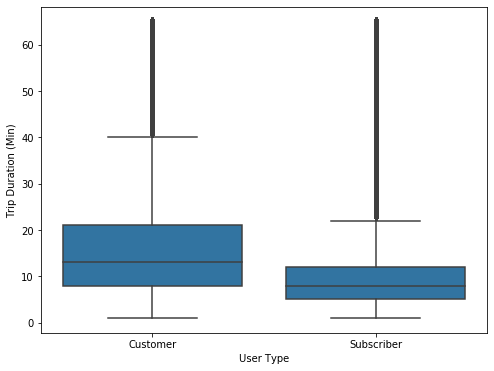

In [37]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 6])
sb.boxplot(data = without_outliers, x = 'user_type', y = 'duration_min', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Min)');

The average trip duration for customers is longer compared to those of subscribers by a couple of minutes. Nevertheless is an important observation as Bay Wheels charges per minute for some of its pricing plans. The duration of half of the customer trips lie between around 9 to 20 minutes. This also shows longer trip frequency compared to subscribers with an upper whisker of 20 minutes.

Now let's take a look whether the trip duration duration by gender.

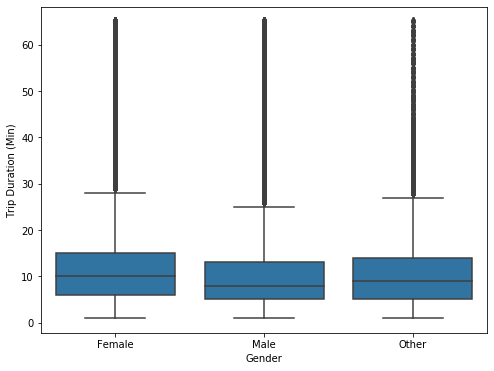

In [38]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 6])
sb.boxplot(data = without_outliers, x = 'member_gender', y = 'duration_min', color = base_color)
plt.xlabel('Gender')
plt.ylabel('Trip Duration (Min)');

On average, females have slightly longer trips, followed by other and then males.

Previously we have seen that weekends have a lower number of trips compared to weekdays. What about their duration? Let's also plot hours, day and months against trip duration.

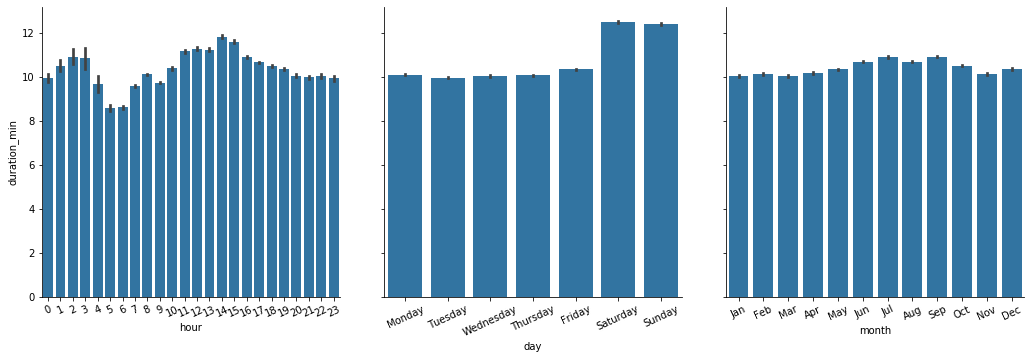

In [39]:
def bargrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    g = sb.barplot(x, y, color = default_color)
    g.set_xticklabels(g.get_xticklabels(),rotation=25)

g = sb.PairGrid(data = without_outliers, y_vars = 'duration_min', x_vars = ['hour', 'day', 'month'])
g.fig.set_size_inches(15,5)
g.map(bargrid)
plt.show();

The shortest trip durations are during 5 AM - 6 AM on average, then it increases reaching a peak during 2 PM - 3 PM. Trips are short during weekdays which might be due to work/school schedules and routine. On the other hand, weekends have longer average trip duration. Let's see what type of user contribute with the majority of trips during weekends later on. Lastly for months, the average duration time is not showing an interesting trend. The duration slightly increases but starts decreasing from October.



Now let's explore the trip time, day and month against our categorical user information such as their type and age.

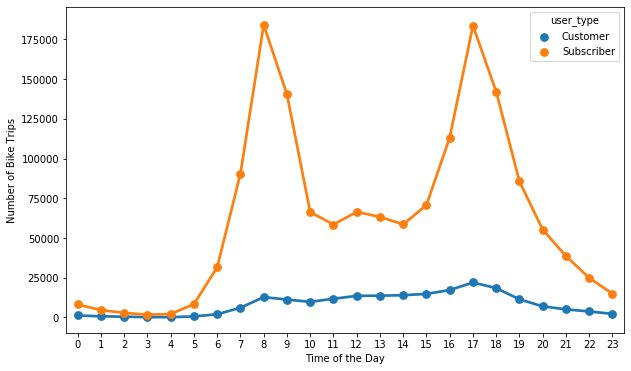

In [40]:
#aggregating the data
user_hour = df_clean.groupby(['hour', 'user_type']).agg({'bike_id': 'count'}).reset_index()

#plotting the trend line
plt.figure(figsize=(10,6))
sb.pointplot(x = 'hour', y = 'bike_id', hue='user_type', data = user_hour)
plt.xlabel('Time of the Day')
plt.ylabel('Number of Bike Trips');

While the number of trips for subscribers keep decreasing from 10 AM, the opposite is happening for customers. We can observe a slight steady increase until reaching the peak point at 5 PM. This further shows how the different user types might be using Bay Wheels for different purposes. We could also observe the drastic changes being driven by rush hour times, 8 AM and 5 PM for Subscribers.

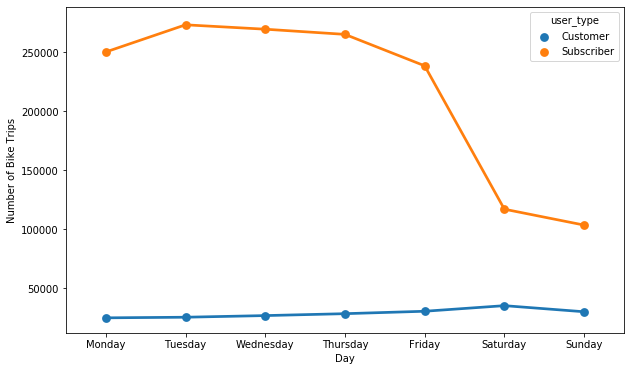

In [41]:
#aggregating the data
user_day = df_clean.groupby(['day', 'user_type']).agg({'bike_id': 'count'}).reset_index()

#plotting the trend line
plt.figure(figsize=(10,6))
sb.pointplot(x = 'day', y = 'bike_id', hue='user_type', data = user_day)
plt.xlabel('Day')
plt.ylabel('Number of Bike Trips');

Again we are seeing a slight increase day by day for customers up until Sunday. As we have previously explored, there are much more subscribers than customers which explains the reason behind the drop in the number of trips during weekends. Subscribers are mainly using the service during weekdays whilst customers have the highest number of trips during weekends. In addition, the trips taken by subscribers decrease from Wednesday, with a steeper decrease on Friday. It would be interesting to investigate the increase in the number of trips on Tuesday.

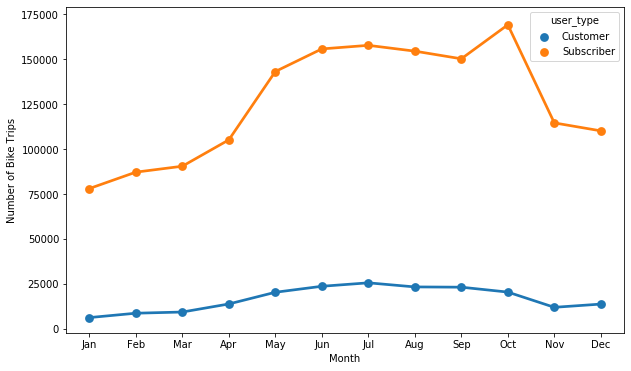

In [42]:
#aggregating the data
user_month = df_clean.groupby(['month', 'user_type']).agg({'bike_id': 'count'}).reset_index()

#plotting the trend line
plt.figure(figsize=(10,6))
sb.pointplot(x = 'month', y = 'bike_id', data = user_month, hue='user_type')
plt.xlabel('Month')
plt.ylabel('Number of Bike Trips');

We can observe that the number of trips by subscribers significantly increased during May as well as October and drastically dropped starting November. For customers, the peak month has been July. Unlike subscribers, their number of trips decreased during October. 

Moving on to age, we have seen that the average age is 35 years old. Let's create age intervals and explore patterns, if any, against one of our datetime values (to be decided based on trial and error).

In [43]:
#create age bins
df_clean['age_bins'] = pd.cut(x=df_clean['member_age'], bins=[18, 30, 40, 50, 60])
df_clean['age_bins'].value_counts()

(18, 30]    704202
(30, 40]    615016
(40, 50]    263111
(50, 60]    128588
Name: age_bins, dtype: int64

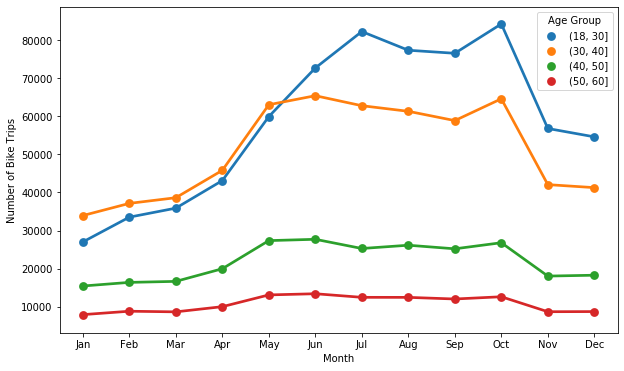

In [44]:
#aggregating the data
age_month = df_clean.groupby(['month', 'age_bins']).agg({'bike_id': 'count'}).reset_index()

#plotting the trend line
plt.figure(figsize=(10,6))
sb.pointplot(x = 'month', y = 'bike_id', data = age_month, hue='age_bins')
plt.xlabel('Month')
plt.ylabel('Number of Bike Trips')
plt.legend(title = 'Age Group');

At the beginning of 2018, the 30-40 age group had the highest number of trips. It remained occupying the highest monthly trip count up until June. This is when the turning point happened where the 18-30 age group took the lead and kept it until the end of the year. The 18-30 age group has been increasing month by month from Jan till May with almost the same numbers as the 30-40 age group but what suddenly happened during June?

Before wrapping bivariate exploration, could their be an interesting pattern between age and user type? Let's find out.

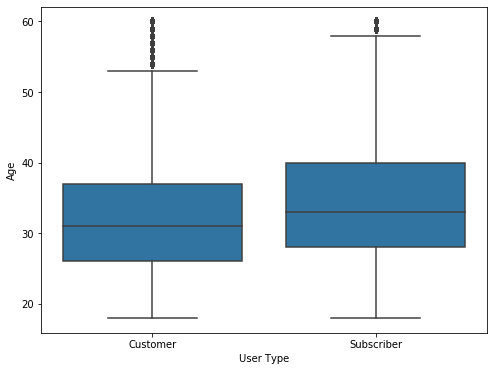

In [45]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 6])
sb.boxplot(data = df_clean, x = 'user_type', y = 'member_age', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Age');

Subscibers are slightly older on average compared to Customers, with more variability. 

What about gender and user type?

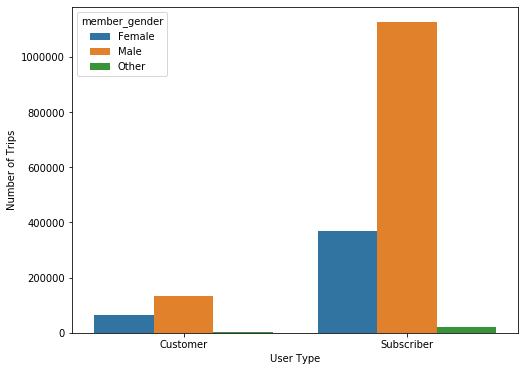

In [46]:
#plotting user_types with gender
plt.figure(figsize = [8, 6])
sb.countplot(data = df_clean, x = 'user_type', hue = 'member_gender')
plt.xlabel('User Type')
plt.ylabel('Number of Trips');

There aren't any new observations but we can see that the male and female ratios are slightly different. Females have a higher proportion in customer users compared to subscibers users.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Each user type have different patterns and exhibit different preferences. Subscibers depict the behavior of school/work commuters where they used the service mostly during weekdays with the number of trips reaching its peak at 8AM & 5 PM. It was intersting to see the drastic changes being driven by rush hour. On the other hand, customers are more causual and flexible, having higher number of trips during weekends. The service is being used the most in July by customers and in october for subscribers. <br> <br> Furthermore, the average trip duration for customers is longer compared to those of subscribers by a couple of minutes - which is could be explained by the above exploration insights. The shortest trip durations are during 5 AM - 6 AM on average, then it increases reaching a peak during 2 PM - 3 PM.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was interesting to see the monthly trend line by age groups. At the beginning of 2018, the 30-40 age group had the highest number of trips. It remained occupying the highest monthly trip count up until June. This is when the turning point happened where the 18-30 age group took the lead and kept it until the end of the year. <br> <br> Moreover, the daily/monthly number of trips for subscribers were compelling. Why would the numbers drastically increase during May and October? Also, Tuesday had the highest trip count - another unexpected finding!


## Multivariate Exploration

> Previously, we've looked at the hourly, daily and monthly trends of customers and subscribers but separately. It's time to bring all the variables together to understand the big picture. <br><br>
This section mainly focuses on exploring how both user types differ across multiple variables combined (trip duration, start time hour, day and month) and factoring in the gender as well as age. 

We have explored the how the trip duration varied by hour, month and day. Let's factor in the user types now to observe their trends.

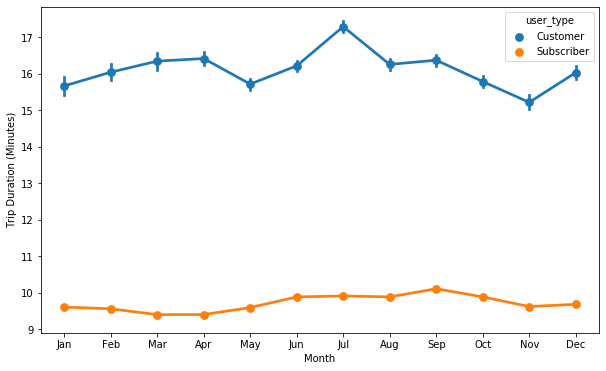

In [47]:
plt.figure(figsize=(10,6))
sb.pointplot(x = 'month', y = 'duration_min', hue='user_type', data = without_outliers)
plt.xlabel('Month')
plt.ylabel('Trip Duration (Minutes)');

This plot shows more the average trip duration difference between customers and subscribers. The error bars for  customer users provides some indication of the uncertainty around that estimate even though the plot excludes outliers. Previously, we observed that customers had the highest number of trip in July and here we are also seeing the longer trip durations of 17 minutes in July.

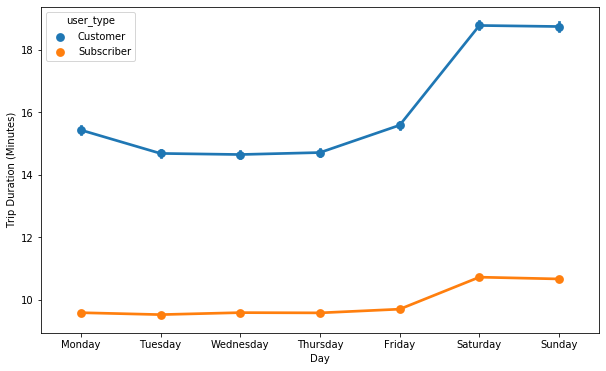

In [48]:
plt.figure(figsize=(10,6))
sb.pointplot(x = 'day', y = 'duration_min', hue='user_type', data = without_outliers)
plt.xlabel('Day')
plt.ylabel('Trip Duration (Minutes)');

We've already established based on previous exploration that the average trip duration during weekends are longer but this plot shows that even subscribers tend to bike longer during weekends compared to their relatively unchanging weekday trip durations.

Now let's see how gender plays in the monthly and daily trend lines for both user types. Since we are already aware that subscibers have much more trips compared to customers, we'll won't apply the same axis for the plot to better see gender related patterns to customer and subscribers.

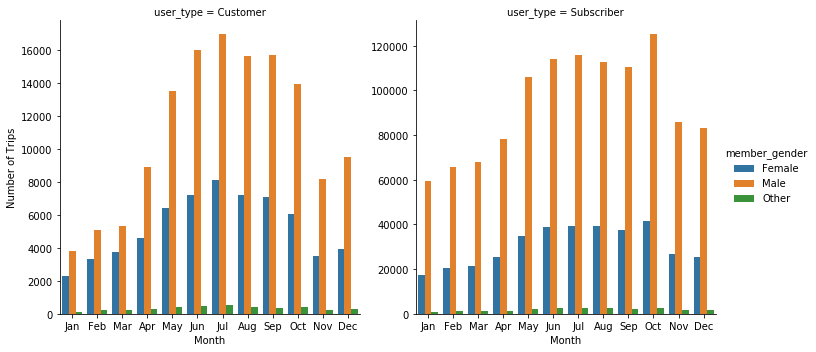

In [50]:
g = sb.catplot(x = "month", col="user_type", hue = 'member_gender',data = df_clean, kind="count", sharey=False)
g.set_axis_labels("Month", "Number of Trips");

There no specific patterns related to each gender but during the first 3 months in 2018, we can observe a really small male to female ratio for customers. However, starting April, the number of trips of male customers took off and drastically increased compared to that of female trips.

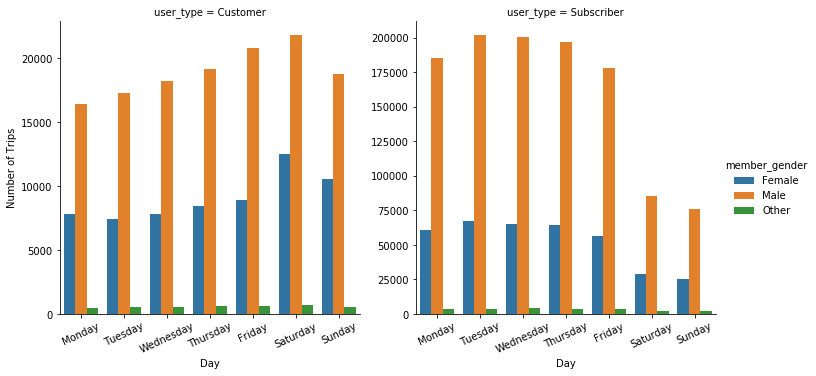

In [51]:
g = sb.catplot(x = "day", col="user_type", hue = 'member_gender',data = df_clean, kind="count", sharey=False)
g.set_xticklabels(rotation=25)
g.set_axis_labels("Day", "Number of Trips");

From our previous exploration, we observed that customers have the highest number of trips in weekends, reaching its peak on Saturday. It is interesting to see that the increase was maily due to females since the number of trips for male trips didn't increase as much from Friday to Saturday.

Now let's build on our bivariate monthly trend for different age groups graph. Which user type (or maybe both) had more 30-40 year old people using the service during the first 4 months in 2018?

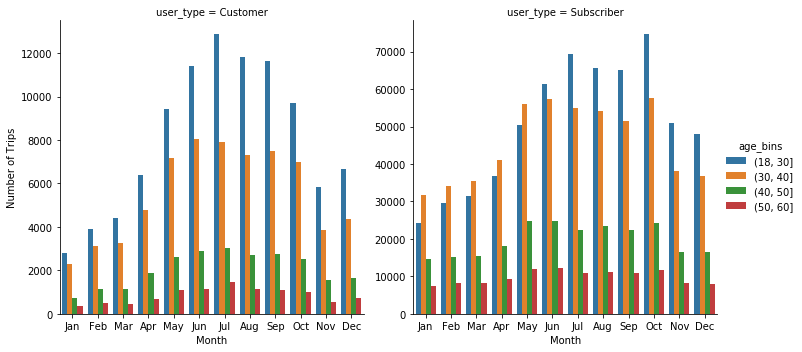

In [52]:
g = sb.catplot(x = "month", col="user_type", hue = 'age_bins',data = df_clean, kind="count", sharey=False)
g.set_axis_labels("Month", "Number of Trips");

Subscibers with ages between 30-40 years old had the highest number of trips during the first 5 months in 2018. Afterwards, those aged 18-30 started taking the leading postion up until the end of the year. For customers, it has always been the 18-30 age group taking the lead.

Before finishing up multivariate analysis, let's explore the hourly trend during weekdays for subscibers and customers.

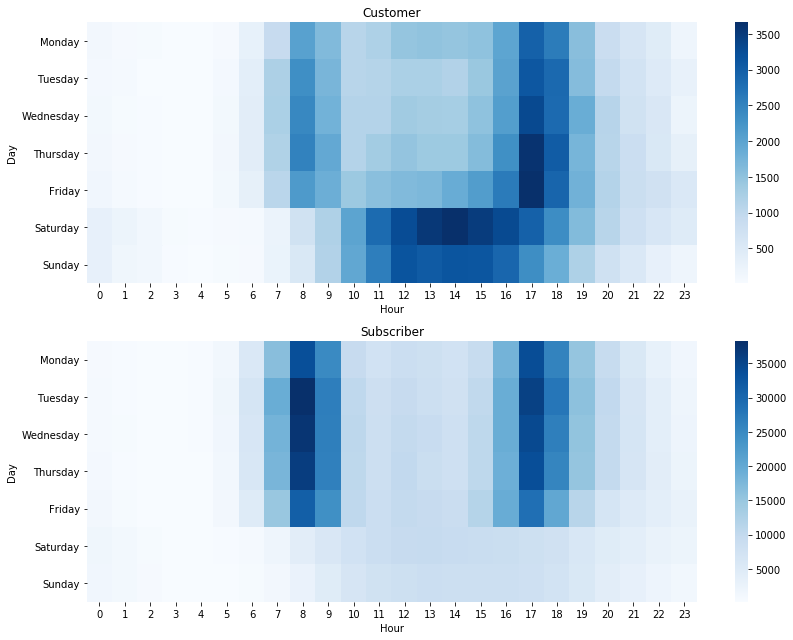

In [53]:
plt.figure(figsize=(12,9))

#summarize the customer counts
customer_counts = df_clean.query('user_type == "Customer"').groupby(["day","hour"]).agg({'bike_id': 'count'}).reset_index()
customer_counts = customer_counts.pivot(index = 'day', columns = 'hour', values = 'bike_id')

# Top plot: customer heatmap
plt.subplot(2, 1, 1)
sb.heatmap(customer_counts, cmap = 'Blues')
plt.title('Customer')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.tight_layout();

#summarize the subscriber counts
subscriber_counts = df_clean.query('user_type == "Subscriber"').groupby(["day","hour"]).agg({'bike_id': 'count'}).reset_index()
subscriber_counts = subscriber_counts.pivot(index = 'day', columns = 'hour', values = 'bike_id')

# Bottom plot: Subscriber heatmap
plt.subplot(2, 1, 2)

#plotting the heatmap
sb.heatmap(subscriber_counts, cmap = 'Blues')
plt.title('Subscriber')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.tight_layout();

The heatmap perfectly reinforces the different behavior and patterns of Customers & Subscribers.

**Subscribers:** The highest number of trips are concentrated during weekdays from Monday to Friday, mainly during 8AM and 5 PM. On weekends, the numbers of trips significantly dropped and were more around the afternoon on these days. Overall Peak: Tuesday 8 AM <br>

**Customers:** They are using the service most often during the weekends from around 12 AM to 3-4 PM - that's when the number of trips are highly concentrated. On weekdays, they tend to bike mostly at 5 PM. Overall Peak: Saturday 2 PM & Friday 5 PM.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate analysis shed light more on the different relationships and how they vary with one another. I extended the investigation by factoring in the user types, gender and age to observe the trends altogether with trip duration and start time. For trip durations, even Subscribers tend to bike longer on average during weekends compared to their relatively unchanging weekday trip duration pattern. Overall, the differences in behavior of both user types, customers and subscibers, were reinforced and were much clearer. It was shown that the most number of customer trips were on Saturday 2 PM & Friday 5 PM. On the contrary, it was Tuesday 8 AM for subscribers.



### Were there any interesting or surprising interactions between features?

> It was interesting to see that subscibers with ages between 30-40 years old had the highest number of trips during the first 5 months in 2018. Afterwards, those aged 18-30 started taking the leading postion up until the end of the year. For customers, it has always been the 18-30 age group taking the lead. In addition, it was interesting to see that the increase in the customer number of trips on Saturday was maily due to females.